In [1]:
'''
Segment the OASIS brain data set with an Improved UNet.

@author Aghnia Prawira (45610240)
'''

import data_processing as dp
import improved_unet as iu
from importlib import reload
reload(dp)
reload(iu)

import os
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


Tensorflow version: 2.1.0
Tensorflow version: 2.1.0


In [2]:
dp.test()
iu.test()

Testing data processing.
Testing improved unet.


In [3]:
# Set path to dataset
dataset_path = "keras_png_slices_data/"

seg_test_path = dataset_path + "keras_png_slices_seg_test/"
seg_train_path = dataset_path + "keras_png_slices_seg_train/"
seg_val_path = dataset_path + "keras_png_slices_seg_validate/"
test_path = dataset_path + "keras_png_slices_test/"
train_path = dataset_path + "keras_png_slices_train/"
val_path = dataset_path + "keras_png_slices_validate/"

In [4]:
# Load images
seg_test = dp.load_image(seg_test_path)
seg_train = dp.load_image(seg_train_path)
seg_val = dp.load_image(seg_val_path)
test = dp.load_image(test_path)
train = dp.load_image(train_path)
val = dp.load_image(val_path)

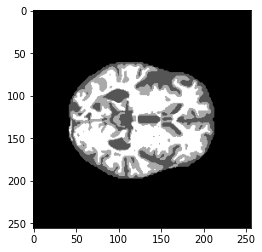

In [5]:
plt.imshow(seg_train[0])

In [6]:
# print(np.array(seg_test[:int(len(seg_test)*0.2)]).shape)
# print(np.array(seg_train[:int(len(seg_train)*0.2)]).shape)
# print(np.array(seg_val[:int(len(seg_val)*0.2)]).shape)

In [7]:
# One hot encode labels
seg_test = dp.one_hot_encode(seg_test)

In [8]:
seg_train = dp.one_hot_encode(seg_train)

In [9]:
seg_val = dp.one_hot_encode(seg_val)

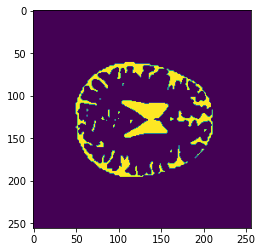

In [10]:
plt.imshow(seg_test[0][:,:,2])

In [11]:
reload(iu)
# Generate improved unet model
model = iu.unet()

Tensorflow version: 2.1.0
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 4)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 592         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 256, 256, 16) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 16) 2320        leaky_re_lu_1[0][0]              
__________________________________________________________________

In [12]:
# Compile the model
model.compile(optimizer='adam', 
              loss=iu.dice_loss, metrics=[iu.dice_coefficient_avg])

In [13]:
print(np.array(seg_train).shape)
print(np.array(train).shape)

(100, 256, 256, 4)
(100, 256, 256, 4)


In [14]:
# Train the model
history = model.fit(np.array(train), np.array(seg_train), 
                    batch_size=32, epochs=30, 
                    validation_data=(np.array(val), np.array(seg_val)))

Train on 100 samples, validate on 100 samples
Epoch 1/30
100/100 [==============================] - 9s 87ms/step - loss: 0.7402 - dice_coefficient_avg: 0.2939 - val_loss: 0.2976 - val_dice_coefficient_avg: 0.7022
Epoch 2/30
100/100 [==============================] - 1s 13ms/step - loss: 0.2860 - dice_coefficient_avg: 0.7148 - val_loss: 0.2815 - val_dice_coefficient_avg: 0.7183
Epoch 3/30
100/100 [==============================] - 1s 13ms/step - loss: 0.2816 - dice_coefficient_avg: 0.7210 - val_loss: 0.2779 - val_dice_coefficient_avg: 0.7219
Epoch 4/30
100/100 [==============================] - 1s 13ms/step - loss: 0.2782 - dice_coefficient_avg: 0.7223 - val_loss: 0.2778 - val_dice_coefficient_avg: 0.7220
Epoch 5/30
100/100 [==============================] - 1s 13ms/step - loss: 0.2781 - dice_coefficient_avg: 0.7216 - val_loss: 0.2778 - val_dice_coefficient_avg: 0.7221
Epoch 6/30
100/100 [==============================] - 1s 13ms/step - loss: 0.2781 - dice_coefficient_avg: 0.7218 - val_